Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 177.0/177.0 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 781.

In [23]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



In [44]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 40

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [45]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

display(lbl_train)

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [46]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

model.summary()

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4029 - accuracy: 0.8892 - val_loss: 0.2134 - val_accuracy: 0.9380
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1883 - accuracy: 0.9463 - val_loss: 0.1630 - val_accuracy: 0.9537
Epoch 3/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1375 - accuracy: 0.9600 - val_loss: 0.1207 - val_accuracy: 0.9643
Epoch 4/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1069 - accuracy: 0.9696 - val_loss: 0.1015 - val_accuracy: 0.9711
Epoch 5/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0881 - accuracy: 0.9741 - val_loss: 0.0921 - val_accuracy: 0.9710
Epoch 6/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0740 - accuracy: 0.9789 - val_loss: 0.0867 - val_accuracy: 0.9742
Epoch 7/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0631 - accuracy: 0.9821 - val_loss: 0.0788 - val_accuracy: 0.9763
Epoch 

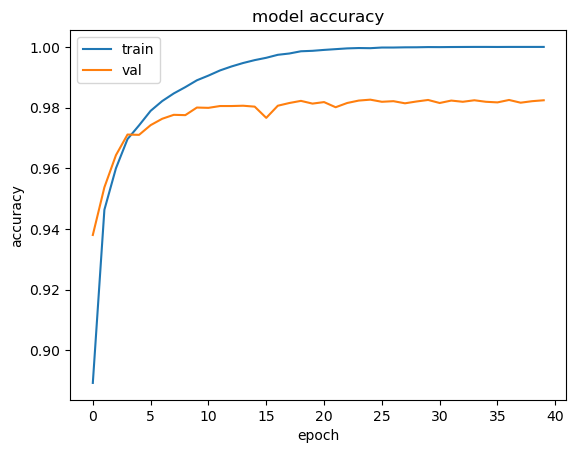

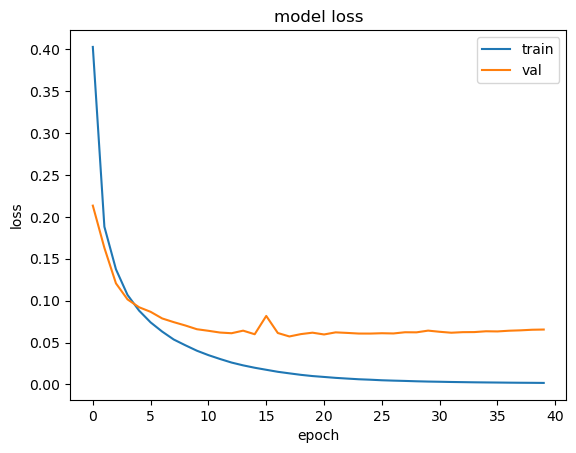

In [47]:
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

plt.plot(fit_info.history['loss'])
plt.plot(fit_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

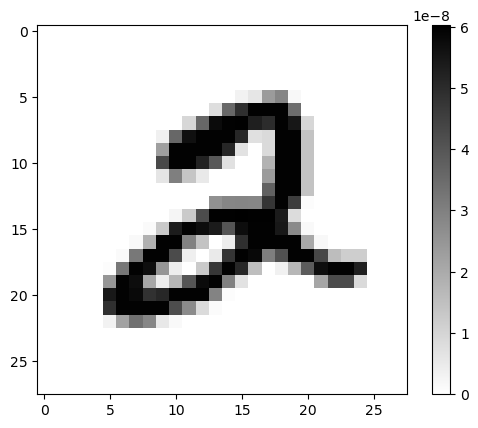

In [17]:
plt.figure()
plt.imshow(x_train[5], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

### Question 4) Auto-Encoder for denoising


In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [ ]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))
